In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [18]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Read data with numpy
data = np.genfromtxt("Salary_dataset.csv", delimiter=",", dtype=str)


In [20]:
# Features
X = data[1:, 1].astype(float)
y = data[1:, 2].astype(float)
print(X, y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6] [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


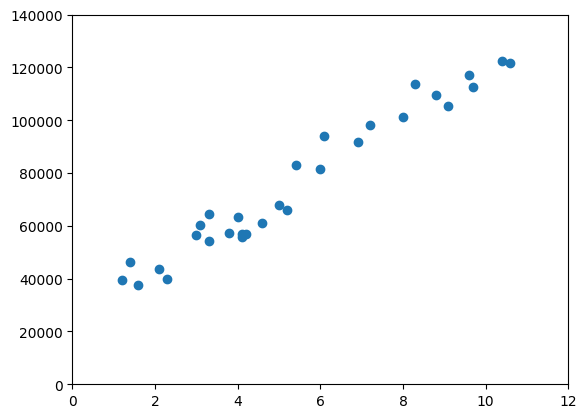

In [21]:

#You have to reproduce this graph
plt.scatter(X, y)
plt.xlim(0, 12)
plt.ylim(0, 140000)
plt.show()

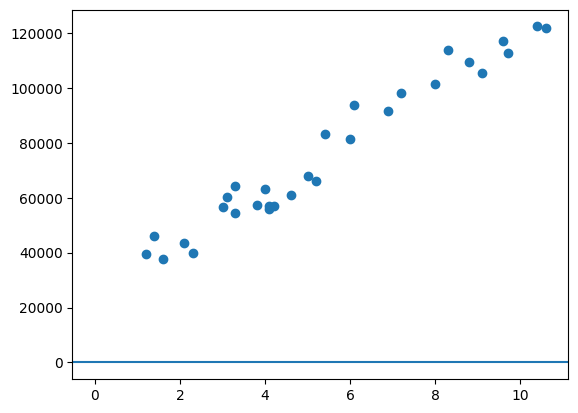

In [22]:
# Let's create a function that displays the point line with the bar.
def visualize(theta, X, y):
    plt.scatter(X,y)
    plt.axline([0, theta[0]], slope = theta[1], label = 'Theta')
    plt.show()

theta = np.zeros(2)
visualize(theta, X, y)

In [23]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
    X = np.array(X)
    return theta[0]+(X*theta[1]) # linear coefficient and angular coefficient


In [24]:
# Optimization with gradient descendent --- to minimaze cost
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    m = X.shape[0] # size

    # Loop over the number of iterations
    for _ in range(num_iters):
        y_pred = predict(X, theta)
        e = y_pred - y
        gradient = np.dot(e,X) / m # partial derivative calc
        theta[1] -= (alpha*gradient)
        theta[0] -= (alpha * np.mean(e)) # intercept update
    # Perform one iteration of gradient descent (i.e., update theta once)
    return theta


In [25]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000
num_inters = 1000 # iters number
alpha = 0.01 # learning rate path

theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, alpha, num_inters)
print(finetuned_theta)

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

# X = 0 = 21912.58918422329

# for each year the salary add 9880.814004608217

# function
# y = 21912.59 + 9880.81 * X

[21912.58918422  9880.81400461]


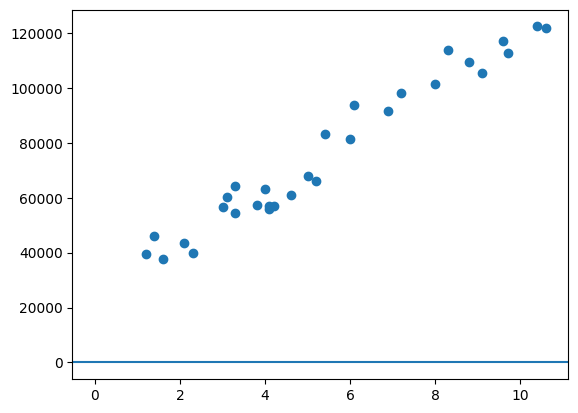

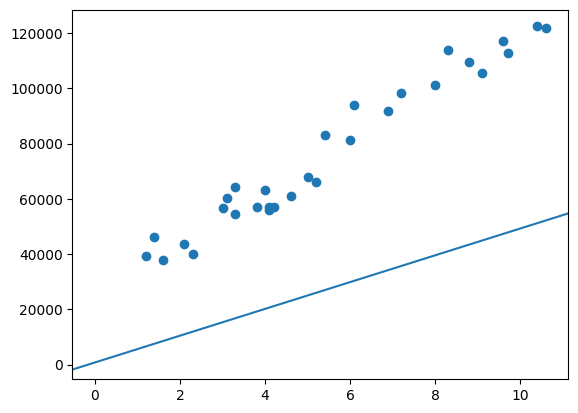

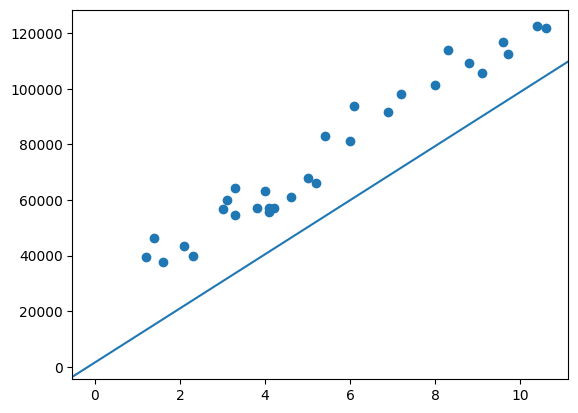

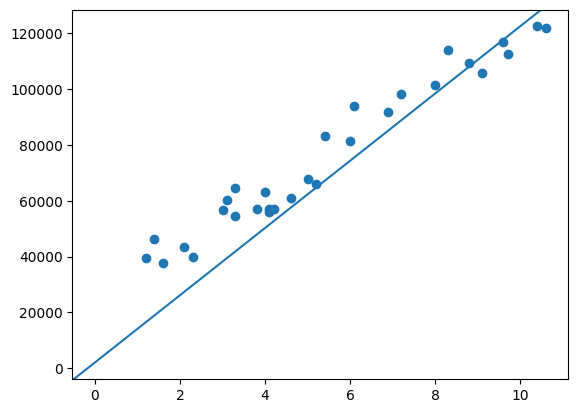

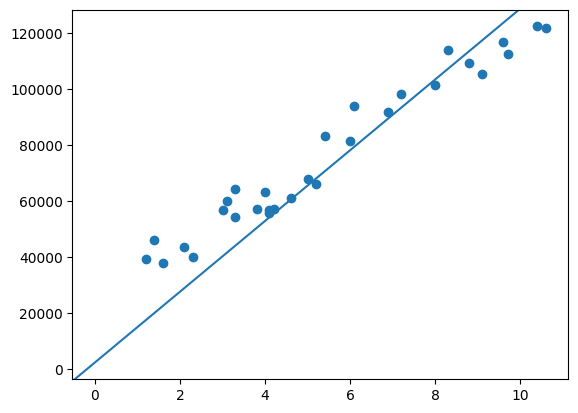

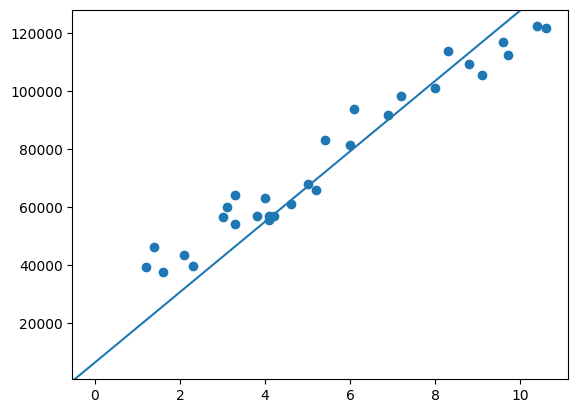

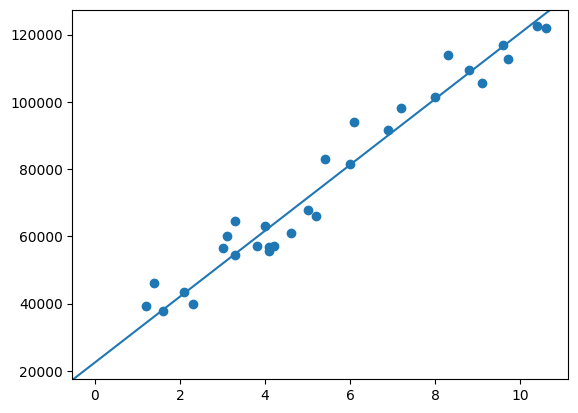

In [26]:
theta = np.zeros(2)
# Ok, let's test our function now, you should get a result comparable to this one
visualize(fit(X, y, theta, 0.01, 0), X, y)
visualize(fit(X, y, theta, 0.01, 1), X, y)
visualize(fit(X, y, theta, 0.01, 2), X, y)
visualize(fit(X, y, theta, 0.01, 3), X, y)
visualize(fit(X, y, theta, 0.01, 4), X, y)
visualize(fit(X, y, theta, 0.01, 100), X, y)
visualize(fit(X, y, theta, 0.01, 1000), X, y)


In [12]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions -y
    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    squared_errors = errors**2
    cost = (1/(2*m))*np.sum(squared_errors)
    # Return the computed cost as a measure of model fit
    return cost


In [13]:
# Test it with theta = [0,0]. You should get approximately 3251553638.
if X.ndim == 1:
  X=X.reshape(-1,1)
X=np.insert(X,0,1, axis=1)
thetha_zero=np.array([0,0])

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)


3251553638.866667


In [14]:
def predict(X, theta):
    return np.dot(X, theta)

def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_history = []

    for itr in range(num_iters):
        predictions = predict(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= alpha * gradient
        cost_value = cost(X, y, theta)
        J_history.append(cost_value)

    return (theta, J_history)

# Ensure X is prepared
if X.ndim == 1:
    X = X.reshape(-1, 1)
if np.all(X[:, 0] != 1):
    X = np.insert(X, 0, 1, axis=1)  # Add intercept term

# Initialize theta with zeros for each feature
theta = np.zeros(X.shape[1])

# Define learning rate and iterations
alpha = 0.001
num_iters = 100

# Start the training
theta, J_history = fit_with_cost(X, y, theta, alpha, num_iters)
print("Theta after fitting:", theta)
print("Cost history:", J_history)


Theta after fitting: [ 2309.28858258 12482.56250236]
Cost history: [3015112434.5917063, 2796244809.6039634, 2593644476.8563786, 2406102248.8579545, 2232498820.022907, 2071798085.5257049, 1923040956.7821906, 1785339636.641324, 1657872320.116127, 1539878289.0224388, 1430653371.2453456, 1329545737.5295925, 1235952010.7049966, 1149313664.122775, 1069113687.8050503, 994873502.4077177, 926150102.5761136, 862533412.642144, 803643838.8790009, 749130003.7028583, 698666648.2969792, 651952691.1389688, 608709430.8425198, 568678882.5863825, 531622238.2006999, 497318440.718943, 465562864.8869377, 436166095.7529271, 408952798.048066, 383760669.6086661, 360439472.59316283, 338850136.71112657, 318863929.1114876, 300361685.9750267, 283233101.224503, 267376068.10672182, 252696069.7164408, 239105614.82414553, 226523715.6401463, 214875404.39776486, 204091285.8700918, 194107123.1492833, 184863454.2159109, 176305237.00966096, 168381520.8828113, 161045142.4753847, 154252444.19665673, 147963013.6326316, 142139

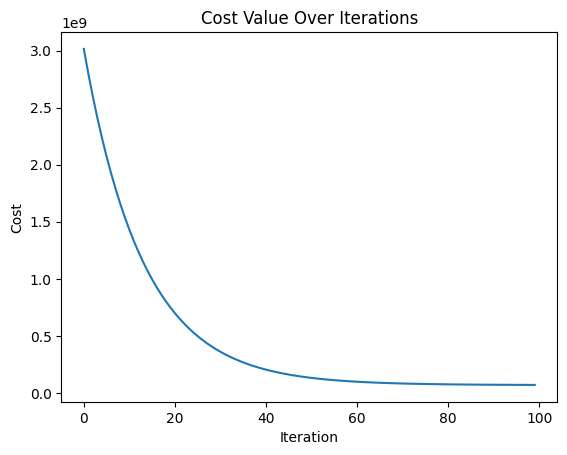

In [15]:
# Assuming J_history contains the cost values from the gradient descent
# which you have already computed in the previous steps

plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Value Over Iterations')
plt.show()


In [ ]:
#You have to reproduce this graph

In [16]:


def predict(x, theta):
    # Assuming theta[0] is the intercept and theta[1] is the slope
    return theta[0] + theta[1] * x

# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))


Predicted salary for 10 years of experience 127134.91360616997


In [17]:


def predict(x, theta):
    # Assuming theta[0] is the intercept and theta[1] is the slope
    return theta[0] + theta[1] * x

# Years of experience of the person you want to predict the salary for
years_experience = 15

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))


Predicted salary for 15 years of experience 189547.72611796323
